Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

comnetario


Precisão: 1.0


In [1]:
# Exercício 1 - Treinamento do modelo baseado em árvore de decisão

# Importar as bibliotecas necessárias
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar os parâmetros do modelo
params = {
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}

# Treinar o modelo
tree_clf = DecisionTreeClassifier(**params, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar o modelo
y_pred = tree_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy:.4f}')


Acurácia do modelo: 0.8581


In [2]:
#Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble

# Importar as bibliotecas necessárias
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Converter os valores de y para inteiros
y = y.astype(int)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar os parâmetros do modelo de árvore de decisão
params = {
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}

# Treinar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(**params, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar o modelo de árvore de decisão
y_pred_tree = tree_clf.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Acurácia do modelo de Árvore de Decisão Simples: {accuracy_tree:.4f}')

# Treinar e avaliar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')

# Treinar e avaliar o modelo XGBoost
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=10, max_depth=10, n_estimators=100, random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')

# Comparar as acurácias dos modelos
print(f'Acurácia do modelo de Árvore de Decisão Simples: {accuracy_tree:.4f}')
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')



Acurácia do modelo de Árvore de Decisão Simples: 0.8581
Acurácia do modelo Random Forest: 0.9441
Acurácia do modelo XGBoost: 0.9740
Acurácia do modelo de Árvore de Decisão Simples: 0.8581
Acurácia do modelo Random Forest: 0.9441
Acurácia do modelo XGBoost: 0.9740


In [3]:
#Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
#primeiro instalar o Graphviz e a biblioteca graphviz para melhor visualização.
!pip install graphviz xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


Acurácia do modelo de Árvore de Decisão Simples: 0.8581
Acurácia do modelo Random Forest: 0.9441
Acurácia do modelo XGBoost: 0.9740
Acurácia do modelo de Árvore de Decisão Simples: 0.8581
Acurácia do modelo Random Forest: 0.9441
Acurácia do modelo XGBoost: 0.9740


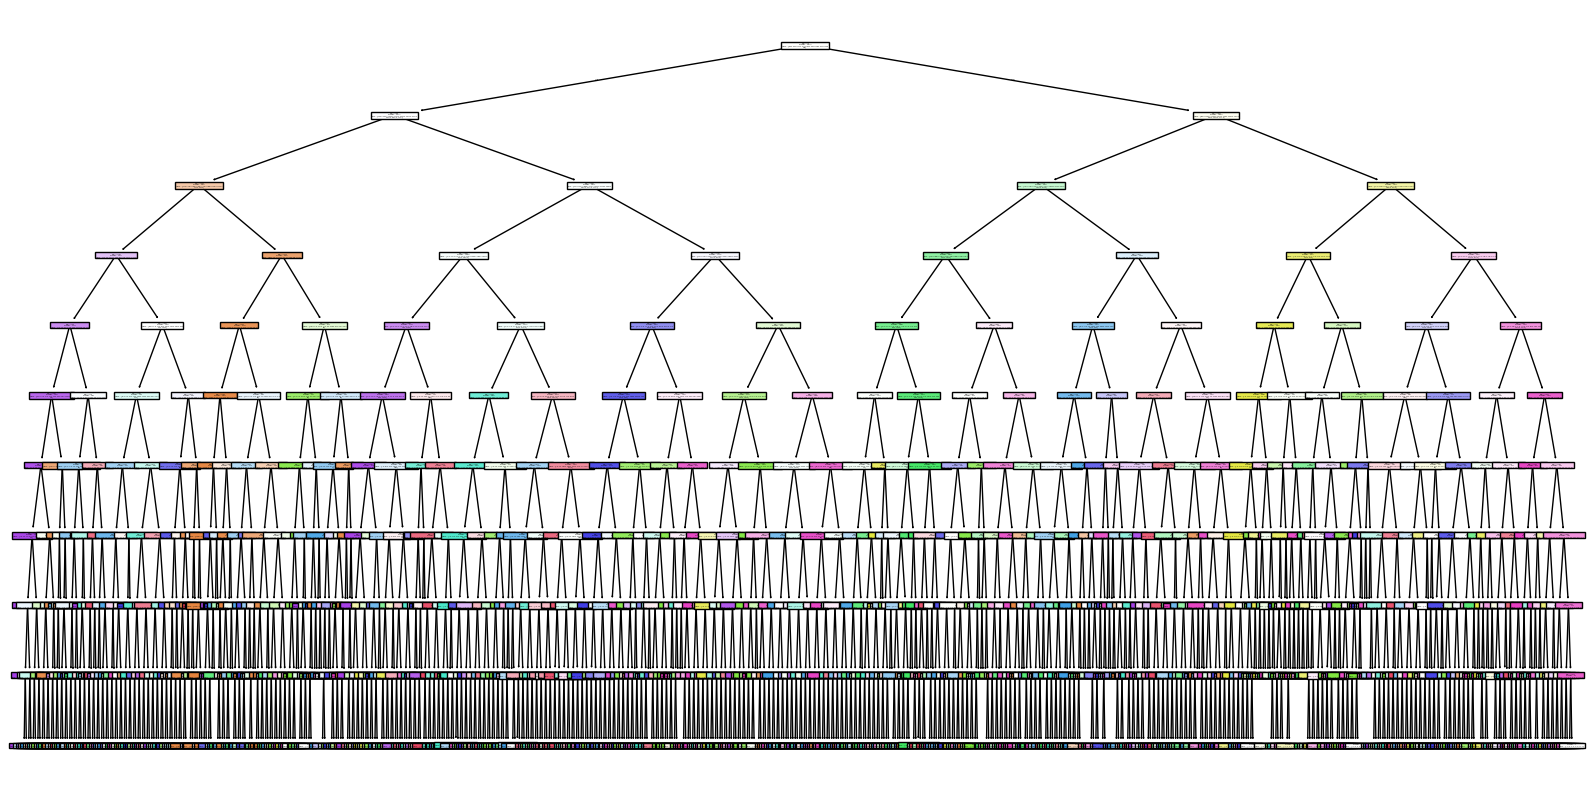

Gini Impurity do conjunto 1: 0.4800
Gini Impurity do conjunto 2: 0.3200


In [4]:
# Importar bibliotecas necessárias
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Converter os valores de y para inteiros
y = y.astype(int)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar os parâmetros do modelo de árvore de decisão
params = {
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}

# Treinar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(**params, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar o modelo de árvore de decisão
y_pred_tree = tree_clf.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Acurácia do modelo de Árvore de Decisão Simples: {accuracy_tree:.4f}')

# Treinar e avaliar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')

# Treinar e avaliar o modelo XGBoost
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=10, max_depth=10, n_estimators=100, random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')

# Comparar as acurácias dos modelos
print(f'Acurácia do modelo de Árvore de Decisão Simples: {accuracy_tree:.4f}')
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=[f'pixel {i}' for i in range(X.shape[1])])
plt.show()

# Função para calcular a medida de impureza (índice de Gini)
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

# Exemplo de cálculo da impureza para diferentes conjuntos de dados
y_example1 = [0, 0, 1, 1, 1]
y_example2 = [0, 1, 1, 1, 1]

gini_example1 = gini_impurity(y_example1)
gini_example2 = gini_impurity(y_example2)

print(f'Gini Impurity do conjunto 1: {gini_example1:.4f}')
print(f'Gini Impurity do conjunto 2: {gini_example2:.4f}')
